In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
# Load the data
data = pd.read_csv('bank-full.csv', delimiter=';')


In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# The dataset you've provided is related to a bank marketing campaign.
# Each row represents a client, and each column provides specific information about that client. 
# The goal of the dataset is to predict whether the client will subscribe to a term deposit based on the provided features.

# Columns (Features):
# age: Age of the client.
# job: Type of job (e.g., management, technician, entrepreneur, etc.).
# marital: Marital status (e.g., married, single, divorced).
# education: Education level (e.g., primary, secondary, tertiary, unknown).
# default: Whether the client has credit in default (yes or no).
# balance: Average yearly balance in euros.
# housing: Whether the client has a housing loan (yes or no).
# loan: Whether the client has a personal loan (yes or no).
# contact: Contact communication type (unknown, telephone, cellular).
# day: Last contact day of the month.
# month: Last contact month of the year.
# duration: Last contact duration, in seconds.
# campaign: Number of contacts performed during this campaign and for this client.
# pdays: Number of days since the client was last contacted from a previous campaign (-1 means the client was not previously contacted).
# previous: Number of contacts performed before this campaign for this client.
# poutcome: Outcome of the previous marketing campaign (unknown, success, failure, other).
# y: Whether the client subscribed to a term deposit (yes or no).

In [17]:
# Data Preprocessing

# Handle categorical variables by encoding them
label_encoder = LabelEncoder()     # Creates an instance of the LabelEncoder class.

# Defines a list of column names in the DataFrame that contain categorical data. These are the columns that will be transformed.
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# fit_transform(data[column]) is called, which does two things:
# fit: Analyzes the column and assigns a unique integer to each unique category.
# transform: Converts each category in the column to its corresponding integer.
# The transformed numerical data is then assigned back to the original column in the DataFrame.
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# LabelEncoder will assign unique integers to each unique job category:

# "management" -> 2
# "technician" -> 3
# "entrepreneur" -> 1
# "blue-collar" -> 0
# After encoding, the job column will look like this:[2, 3, 1, 0, 2]

data.head()

# Encode the target variable separately
target_encoder = LabelEncoder()
data['y'] = target_encoder.fit_transform(data['y'])


In [10]:
# Define features (X) and target (y)
X = data.drop('y', axis=1)
y = data['y']

X.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((36168, 16), (9043, 16), (36168,), (9043,))

In [12]:
# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Display the depth of the tree
clf.get_depth()


28

In [13]:
# Predict on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043

Confusion Matrix:
[[7378  574]
 [ 565  526]]


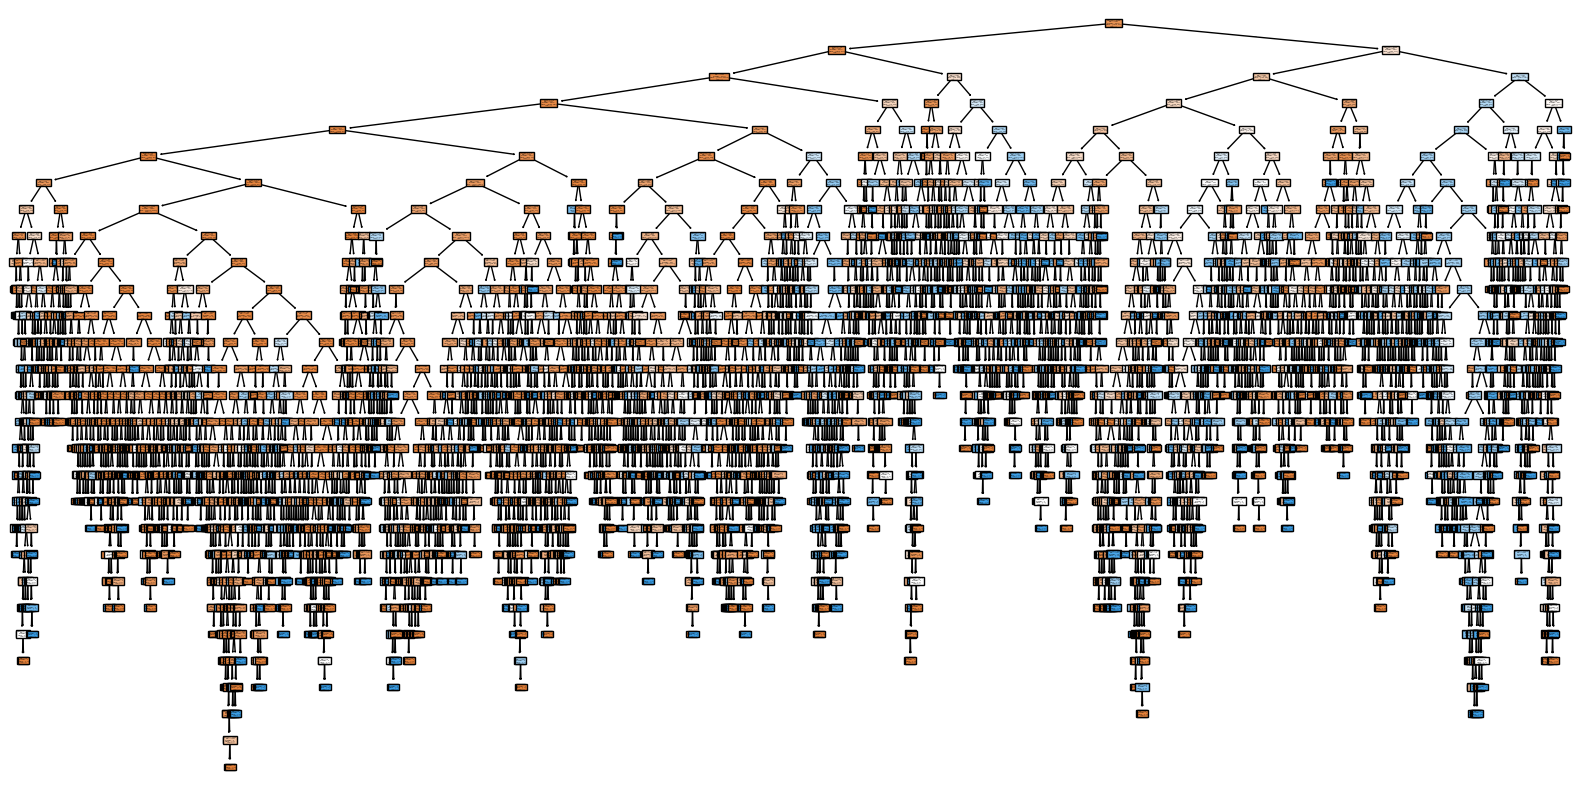

In [19]:
# Plot the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=target_encoder.classes_.astype(str), filled=True)
plt.show()